In the following notebook, we will be tidying the raw data of our US Traffic Accident Data

## Prepare Notebook

**Read in libraries**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import swifter

**Set notebook preferences**

In [65]:
#Set pandas preferences
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_columns', 50)

#Set matplotlib preferences
plt.style.use('ggplot')

#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\US-Accidents A Countrywide Traffic Accident Dataset\Data\01_Raw'

**Read in data**

In [66]:
df = pd.read_csv(path + '/US_Accidents_June20.tar.gz', parse_dates= ['Start_Time', 'End_Time','Weather_Timestamp'])

C:\Users\kishe\Miniconda3\envs\Traffic_Accident_Analysis\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Overview

**Preview Data**

In [67]:
#Preview data 
print('Data shape: ', df.shape)
display(df.head())

Data shape:  (3513741, 49)


,US_Accidents_June20.csv,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3.0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2.0,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3.0,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2.0,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


**Data Information**

In [68]:
#View data types
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513741 entries, 0 to 3513740
Data columns (total 49 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   US_Accidents_June20.csv  object        
 1   Source                   object        
 2   TMC                      float64       
 3   Severity                 float64       
 4   Start_Time               datetime64[ns]
 5   End_Time                 datetime64[ns]
 6   Start_Lat                float64       
 7   Start_Lng                float64       
 8   End_Lat                  float64       
 9   End_Lng                  float64       
 10  Distance(mi)             float64       
 11  Description              object        
 12  Number                   float64       
 13  Street                   object        
 14  Side                     object        
 15  City                     object        
 16  County                   object        
 17  State                    ob

None

**Data Description Statistics**

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TMC,2478818.0,208.022581,20.766272,200.000000,201.000000,201.000000,201.000000,4.060000e+02
Severity,3513740.0,2.339935,0.552210,1.000000,2.000000,2.000000,3.000000,4.000000e+00
Start_Lat,3513740.0,36.542079,4.883511,24.555269,33.637932,35.917032,40.322578,4.900220e+01
Start_Lng,3513740.0,-95.792083,17.368941,-124.623833,-117.441981,-91.026321,-80.933027,-6.711317e+01
End_Lat,1034922.0,37.557911,4.861103,24.570110,33.994868,37.797865,41.051387,4.907500e+01
End_Lng,1034922.0,-100.457364,18.528776,-124.497829,-118.344962,-97.036730,-82.102676,-6.710924e+01
Distance(mi),3513740.0,0.281646,1.550166,0.000000,0.000000,0.000000,0.010000,3.336300e+02
Number,1250786.0,5975.822979,14966.623317,0.000000,864.000000,2798.000000,7098.000000,9.999997e+06
Temperature(F),3448004.0,61.934957,18.621077,-89.000000,50.000000,64.000000,75.900000,1.706000e+02
Wind_Chill(F),1645484.0,53.557487,23.773077,-89.000000,35.700000,57.000000,72.000000,1.150000e+02


**Missing Data**

In [70]:
#Display missing data counts and percentages
missing = pd.DataFrame(df.isna().sum().sort_values(ascending=False), columns=['missing_count'])
missing['missing_%'] = missing.missing_count/len(df) * 100
display(missing)

,missing_count,missing_%
End_Lat,2478819,70.546435
End_Lng,2478819,70.546435
Number,2262955,64.403011
Precipitation(in),2025882,57.655985
Wind_Chill(F),1868257,53.170026
TMC,1034923,29.453594
Wind_Speed(mph),454614,12.938176
Weather_Condition,76144,2.167035
Visibility(mi),75862,2.159009
Humidity(%),69692,1.983413


# Data Cleaning

## Drop Columns, tidy column names

Remove columns with homogenous values or contain mostly missing values

In [71]:
#Update df column names
df.columns = [x.lower() for x in df.columns]

#View counts of unique values per column
print('Unique values per col:\n', df.select_dtypes(exclude='float64').nunique().sort_values())

#Drop cols
df.drop(['us_accidents_june20.csv', 'turning_loop','country', ],axis = 1, inplace = True)

Unique values per col:
 country                          1
turning_loop                     1
give_way                         2
crossing                         2
bump                             2
amenity                          2
nautical_twilight                2
railway                          2
roundabout                       2
junction                         2
astronomical_twilight            2
stop                             2
traffic_calming                  2
traffic_signal                   2
sunrise_sunset                   2
civil_twilight                   2
station                          2
no_exit                          2
side                             3
source                           3
timezone                         4
wind_direction                  24
state                           49
weather_condition              127
county                        1724
airport_code                  2001
city                         11895
street                      176

## Missing Data

In [72]:
df.groupby('state')['severity'].count().sort_values(ascending =False).head(2).sum()

1146110

**Quick EDA**

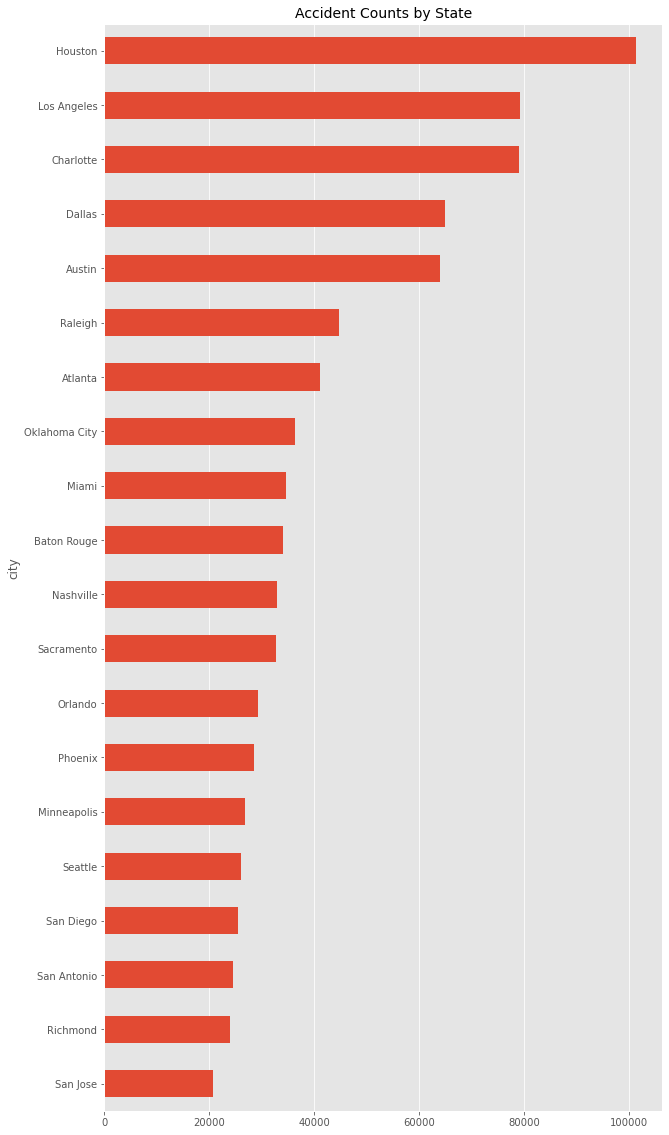

In [78]:
#Create figure
f, ax = plt.subplots(figsize = (10,20))

#Plot accident counts by state
df.groupby('city')['severity'].count().sort_values().tail(20).plot(kind = 'barh', ax=ax)

#Set plot aesthetics
ax.set_title('Accident Counts by State', fontsize = 14)
ax.grid(b=False, which = 'major', axis= 'y')